# KENDAXA ASSIGNMENT - MACHINE LEARNING POSITION
## S&P500 Regression - *by Jan Kořínek*

### Deliverable goals
#### Regression task

Your goal is to perform exploratory data analysis (EDA)
and to train and compare few models on a regression task.
Your task is to predict day-ahed daily volumes of the S&P
500 index using any available information from the past;
i.e., you are going to predict the volume v t+1 using the
information available on days t , t − 1 , . . . .

Evaluate the models performance on out-of-sample data
using data from 2017 and 2018 (i.e., January 1st, 2017 –
December 31st , 2018).

Do not forget that you can use (and should) data outside
the series itself — for example, calendar with known events.

Since your goal is to evaluate and compare several
models along with finding the best, you have to use some
kind of cross-validation as the dataset is quite small (which
is very common for some of the real world datasets).

If you find it applicable, use statistical tests in the EDA
and comparison to distinguis.

#### Report and scope

You are required to write a brief report in the PDF format
(L A TEXusage is recommend) summarizing the approaches
and presenting the results for all three subtasks. It is rec-
ommend to use figures and plots where it will help you
make your point. The report should contain all the necessary
details to understand what approach you have undertaken,
what were the results and how you interpret them.

our report should summarize the main results of your EDA
but it is sufficient to have the details of the EDA only in the
Jupyter notebook. Briefly (very briefly) introduce the used
models. You should compare the models with regards to
more than one metric each with explanation when is each of
the metrics preferable. You should also state your trust in the
individual models — e.g., that even if some model gives you
very good results, you still might not trust it because it is
sensitive to the data changes. Compare the models also with
respect to their robustness and interpretability. Interpret the
few models you will select as your top ranking candidates,
show which features they are relying the most, etc. Where
applicable, perform formal statistical tests to support your
results.

Please, also state the limitations of your work and direc-
tions, in which it can be expanded — it is expected that you
will not be able to exhaust all possible approaches in the
limited time. Please state which of the possible expansions
are most promising and why.

The report is expected to have about 5–12 pages when using
two-column format with figures but there are no hard limits
as the completeness of the presented information is the
goal (as long as there are no empty sentences or fillers, the
length will not be evaluated).

### Content
[1. S&P500 dataset preparation and merging with calendar events](#dataset-preparation)

[2. Initial dataset exploration](#dataset-exploration)

[3. Feature engineering](#feature-eng)

[4. Training of the multiple models](models-training)

[5. Results Discussion and Conclusion](conclusion)

### 1. S&P500 dataset preparation and merging with calendar events <a name="dataset-preparation"></a>

In [1]:
# Load and extract data from raw CSVs into dataframes for S&P500 and relevant events
%run lib/prepare_dataset.py

# Show processed df
sp500_calendar

Processing raw data...


/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/venv/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


Dataset processing finished in: 0:00:21


Open     High      Low    Close        Volume  \
Date                                                           
1990-01-02   353.40   359.69   351.98   359.69  1.620700e+08   
1990-01-03   359.69   360.59   357.89   358.76  1.923300e+08   
1990-01-04   358.76   358.76   352.89   355.67  1.770000e+08   
1990-01-05   355.67   355.67   351.35   352.20  1.585300e+08   
1990-01-08   352.20   354.24   350.54   353.79  1.401100e+08   
...             ...      ...      ...      ...           ...   
2012-07-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2012-09-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2012-12-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2013-06-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2020-03-15  4699.26  4718.50  4681.32  4697.53  3.491150e+09   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
1990-01-02                           NaN              NaN   
1990-01-03                           NaN              NaN   
1990-01-04                           NaN              NaN   
1990-01-05                           NaN              NaN   
1990-01-08                           NaN              NaN   
...                                  ...              ...   
2012-07-01                           0.0        1589000.0   
2012-09-01                           0.0        1589000.0   
2012-12-01                           0.0        1589000.0   
2013-06-01                           0.0        1589000.0   
2020-03-15                           0.0        1589000.0   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  ...  \
Date                                                                  ...   
1990-01-02                    NaN      NaN                       NaN  ...   
1990-01-03                    NaN      NaN                       NaN  ...   
1990-01-04                    NaN      NaN                       NaN  ...   
1990-01-05                    NaN      NaN                       NaN  ...   
1990-01-08                    NaN      NaN                       NaN  ...   
...                           ...      ...                       ...  ...   
2012-07-01                   90.6      0.2                       0.4  ...   
2012-09-01                   90.6      0.2                       0.4  ...   
2012-12-01                   90.6      0.2                       0.4  ...   
2013-06-01                   90.6      0.2                       0.4  ...   
2020-03-15                   90.6      0.2                       0.4  ...   

            Initial Jobless Claim  JOLTs Job Opening  New Home Sale  \
Date                                                                  
1990-01-02                    NaN                NaN            NaN   
1990-01-03                    NaN                NaN            NaN   
1990-01-04                    NaN                NaN            NaN   
1990-01-05                    NaN                NaN            NaN   
1990-01-08                    NaN                NaN            NaN   
...                           ...                ...            ...   
2012-07-01               349100.0          3790000.0       619000.0   
2012-09-01               349100.0          3640000.0       619000.0   
2012-12-01               349100.0          3740000.0       619000.0   
2013-06-01               349100.0          3830000.0       619000.0   
2020-03-15               349100.0          3830000.0       619000.0   

            Nonfarm Payroll   PP  Pending Home Sale  \
Date                                                  
1990-01-02              NaN  NaN                NaN   
1990-01-03              NaN  NaN                NaN   
1990-01-04              NaN  NaN                NaN   
1990-01-05          96000.0  NaN                NaN   
1990-01-08          96000.0  NaN                NaN   
...                     ...  ...                ...   
2012-07-01         162

### 2. Initial dataset exploration <a name="dataset-exploration"></a>

#### Libraries Import and Fonts setup

In [2]:
import copy
import datetime
import numpy as np
import pandas as pd
import statsmodels.tsa.api as tsa
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment

from lib.misc_functions import print_missing_vals, print_corr_matrix, fix_inconsistency,\
    seasonal_decomposition, stationarity_check, plot_correlogram, print_score, concat_df

pd.set_option("display.max.columns", None)
plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

In [3]:
#check the df head
sp500_calendar.head(5)

Open    High     Low   Close       Volume  \
Date                                                      
1990-01-02  353.40  359.69  351.98  359.69  162070000.0   
1990-01-03  359.69  360.59  357.89  358.76  192330000.0   
1990-01-04  358.76  358.76  352.89  355.67  177000000.0   
1990-01-05  355.67  355.67  351.35  352.20  158530000.0   
1990-01-08  352.20  354.24  350.54  353.79  140110000.0   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
1990-01-02                           NaN              NaN   
1990-01-03                           NaN              NaN   
1990-01-04                           NaN              NaN   
1990-01-05                           NaN              NaN   
1990-01-08                           NaN              NaN   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  \
Date                                                                   
1990-01-02                    NaN      NaN                       NaN   
1990-01-03                    NaN      NaN                       NaN   
1990-01-04                    NaN      NaN                       NaN   
1990-01-05                    NaN      NaN                       NaN   
1990-01-08                    NaN      NaN                       NaN   

            Core Retail Sale  Crude Oil Inventorie  Existing Home Sale  \
Date                                                                     
1990-01-02               NaN                   NaN                 NaN   
1990-01-03               NaN                   NaN                 NaN   
1990-01-04               NaN                   NaN                 NaN   
1990-01-05               NaN                   NaN                 NaN   
1990-01-08               NaN                   NaN                 NaN   

            FOMC Meeting Minute  Fed Chairman Bernanke Speak  \
Date                                                           
1990-01-02                  NaN                          NaN   
1990-01-03                  NaN                          NaN   
1990-01-04                  NaN                          NaN   
1990-01-05                  NaN                          NaN   
1990-01-08                  NaN                          NaN   

            Fed Interest Rate Decisio  GD  ISM Manufacturing PM  \
Date                                                              
1990-01-02                        NaN NaN                   NaN   
1990-01-03                        NaN NaN                   NaN   
1990-01-04                        NaN NaN                   NaN   
1990-01-05                        NaN NaN                   NaN   
1990-01-08                        NaN NaN                   NaN   

            ISM Non-Manufacturing PM  Initial Jobless Claim  \
Date                                                          
1990-01-02                       NaN                    NaN   
1990-01-03                       NaN                    NaN   
1990-01-04                       NaN                    NaN   
1990-01-05                       NaN                    NaN   
1990-01-08                       NaN                    NaN   

            JOLTs Job Opening  New Home Sale  Nonfarm Payroll  PP  \
Date                                                                
1990-01-02                NaN            NaN              NaN NaN   
1990-01-03                NaN            NaN              NaN NaN   
1990-01-04                NaN            NaN              NaN NaN   
1990-01-05                NaN            NaN          96000.0 NaN   
1990-01-08                NaN            NaN          96000.0 NaN   

            Pending Home Sale  Philadelphia Fed Manufacturing Inde  \
Date                                                                 
1990-01-02                NaN                                  NaN   
1990-01-03                NaN                                  NaN   
1990-01-04             

In [4]:
#check the df tail
sp500_calendar.tail(5)

Open    High      Low    Close        Volume  \
Date                                                          
2012-07-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2012-09-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2012-12-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2013-06-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2020-03-15  4699.26  4718.5  4681.32  4697.53  3.491150e+09   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
2012-07-01                           0.0        1589000.0   
2012-09-01                           0.0        1589000.0   
2012-12-01                           0.0        1589000.0   
2013-06-01                           0.0        1589000.0   
2020-03-15                           0.0        1589000.0   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  \
Date                                                                   
2012-07-01                   90.6      0.2                       0.4   
2012-09-01                   90.6      0.2                       0.4   
2012-12-01                   90.6      0.2                       0.4   
2013-06-01                   90.6      0.2                       0.4   
2020-03-15                   90.6      0.2                       0.4   

            Core Retail Sale  Crude Oil Inventorie  Existing Home Sale  \
Date                                                                     
2012-07-01              -0.3            -4050000.0           4410000.0   
2012-09-01              -0.3            -4050000.0           4410000.0   
2012-12-01              -0.3            -4050000.0           4410000.0   
2013-06-01              -0.3            -4050000.0           4410000.0   
2020-03-15              -0.3            -4050000.0           4410000.0   

            FOMC Meeting Minute  Fed Chairman Bernanke Speak  \
Date                                                           
2012-07-01                  0.0                          0.0   
2012-09-01                  0.0                          0.0   
2012-12-01                  0.0                          0.0   
2013-06-01                  0.0                          0.0   
2020-03-15                  0.0                          0.0   

            Fed Interest Rate Decisio   GD  ISM Manufacturing PM  \
Date                                                               
2012-07-01                       0.25  2.0                  49.0   
2012-09-01                       0.25  2.0                  49.0   
2012-12-01                       0.25  2.0                  49.0   
2013-06-01                       0.25  2.0                  49.0   
2020-03-15                       0.25  2.0                  49.0   

            ISM Non-Manufacturing PM  Initial Jobless Claim  \
Date                                                          
2012-07-01                      52.5               349100.0   
2012-09-01                      52.5               349100.0   
2012-12-01                      52.5               349100.0   
2013-06-01                      52.5               349100.0   
2020-03-15                      52.5               349100.0   

            JOLTs Job Opening  New Home Sale  Nonfarm Payroll   PP  \
Date                                                                 
2012-07-01          3790000.0       619000.0         162000.0  0.5   
2012-09-01          3640000.0       619000.0         162000.0  0.5   
2012-12-01          3740000.0       619000.0         162000.0  0.5   
2013-06-01          3830000.0       619000.0         162000.0  0.5   
2020-03-15          3830000.0       619000.0         162000.0  0.5   

            Pending Home Sale  Philadelphia Fed Manufacturing Inde  \
Date                                                                 
2012-07-01               -2.4                                 -5.5   
2012-09-01               -2.4                       

In [5]:
# check sampled data
sp500_calendar.sample(10)

Open     High      Low    Close        Volume  \
Date                                                           
1991-03-25   367.48   371.31   367.46   369.83  1.539200e+08   
2009-11-27  1105.47  1105.47  1083.74  1091.49  2.362910e+09   
2010-02-18  1099.03  1108.24  1097.48  1106.75  3.878620e+09   
2020-06-01  3038.78  3062.18  3031.54  3055.73  4.673410e+09   
2016-06-20  2075.58  2100.66  2075.58  2083.25  3.467440e+09   
2016-05-19  2044.21  2044.21  2025.91  2040.04  3.846770e+09   
2014-09-29  1978.96  1981.28  1964.04  1977.80  3.094440e+09   
2014-10-21  1909.38  1942.45  1909.38  1941.28  3.987090e+09   
2008-11-25   853.40   868.94   834.99   857.39  6.952700e+09   
2014-11-05  2015.29  2023.77  2014.42  2023.57  3.766590e+09   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
1991-03-25                           NaN              NaN   
2009-11-27                     -203000.0         550000.0   
2010-02-18                      -22000.0         620000.0   
2020-06-01                      -20236.0        1074000.0   
2016-06-20                      173000.0        1138000.0   
2016-05-19                      156000.0        1116000.0   
2014-09-29                      204000.0         998000.0   
2014-10-21                      213000.0        1018000.0   
2008-11-25                     -157000.0         710000.0   
2014-11-05                      230000.0        1018000.0   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  \
Date                                                                   
1991-03-25                   59.4      0.5                       NaN   
2009-11-27                   49.5      0.2                      -1.3   
2010-02-18                   55.9      0.1                       0.9   
2020-06-01                   86.6     -0.4                      -7.4   
2016-06-20                   92.6      0.2                       0.4   
2016-05-19                   94.2      0.2                      -0.2   
2014-09-29                   92.4      0.0                       0.7   
2014-10-21                   86.0      0.0                       0.7   
2008-11-25                   44.9     -0.1                      -1.1   
2014-11-05                   94.5      0.1                      -0.2   

            Core Retail Sale  Crude Oil Inventorie  Existing Home Sale  \
Date                                                                     
1991-03-25               NaN             1710000.0           3090000.0   
2009-11-27               0.2            10000000.0           6100000.0   
2010-02-18               0.6             3100000.0           5450000.0   
2020-06-01             -17.2             7928000.0           4330000.0   
2016-06-20               0.4             -933000.0           5450000.0   
2016-05-19               0.8             1310000.0           5330000.0   
2014-09-29               0.3            -4273000.0           5050000.0   
2014-10-21              -0.2             8923000.0           5170000.0   
2008-11-25              -2.2             1600000.0           4980000.0   
2014-11-05              -0.2              460000.0           5170000.0   

            FOMC Meeting Minute  Fed Chairman Bernanke Speak  \
Date                                                           
1991-03-25                  NaN                          NaN   
2009-11-27                  0.0                          0.0   
2010-02-18                  0.0                          0.0   
2020-06-01                  0.0                          0.0   
2016-06-20                  0.0                          0.0   
2016-05-19                  0.0                          0.0   
2014-09-29                  0.0                          0.0   
2014-10-21                  0.0                          0.0   
2008-11-25                  0.0                          0.0   
2014-11-05                  0.0                        

In [6]:
# check the data types
sp500_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8134 entries, 1990-01-02 to 2020-03-15
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Open                                 8134 non-null   float64
 1   High                                 8134 non-null   float64
 2   Low                                  8134 non-null   float64
 3   Close                                8134 non-null   float64
 4   Volume                               8134 non-null   float64
 5   ADP Nonfarm Employment Chang         5250 non-null   float64
 6   Building Permit                      3563 non-null   float64
 7   CB Consumer Confidenc                8112 non-null   float64
 8   Core CP                              8112 non-null   float64
 9   Core Durable Goods Order             3558 non-null   float64
 10  Core Retail Sale                     7565 non-null   float64
 11  Crude Oil Inventorie

In [7]:
# descriptive statistics summary
sp500_calendar.describe()


Open         High          Low        Close        Volume  \
count  8134.000000  8134.000000  8134.000000  8134.000000  8.134000e+03   
mean   1449.927989  1458.182617  1441.153016  1450.232155  2.335081e+09   
std     944.731760   948.723418   940.657613   944.861231  1.810961e+09   
min     295.450000   301.450000   294.510000   295.460000  1.499000e+07   
25%     866.555000   876.105000   854.000000   868.187500  5.835575e+08   
50%    1236.120000  1244.935000  1226.715000  1236.180000  2.145965e+09   
75%    1851.600000  1866.167500  1841.067500  1852.472500  3.643360e+09   
max    4699.260000  4718.500000  4681.320000  4697.530000  1.145623e+10   

       ADP Nonfarm Employment Chang  Building Permit  CB Consumer Confidenc  \
count                   5250.000000     3.563000e+03            8112.000000   
mean                  109165.175619     1.148633e+06              94.627305   
std                   212259.647327     1.239781e+06              26.796562   
min                  -742000.000000     4.900000e+05              25.000000   
25%                     9000.000000     7.470000e+05              72.900000   
50%                   154000.000000     1.086000e+06              97.400000   
75%                   205000.000000     1.298000e+06             113.175000   
max                   978000.000000     1.700000e+07             144.700000   

           Core CP  Core Durable Goods Order  Core Retail Sale  \
count  8112.000000               3558.000000       7565.000000   
mean      0.194601                  0.157645          0.344455   
std       0.122494                  1.392928          1.470607   
min      -0.400000                 -7.400000        -17.200000   
25%       0.100000                 -0.400000          0.000000   
50%       0.200000                  0.200000          0.300000   
75%       0.200000                  0.800000          0.800000   
max       0.900000                  4.000000         12.400000   

       Crude Oil Inventorie  Existing Home Sale  FOMC Meeting Minute  \
count          8.112000e+03        8.112000e+03               3530.0   
mean           2.068719e+05        5.007514e+06                  0.0   
std            5.372307e+06        9.837624e+05                  0.0   
min           -7.700000e+07        2.900000e+06                  0.0   
25%           -1.800000e+06        4.340000e+06                  0.0   
50%            1.180000e+05        5.100000e+06                  0.0   
75%            1.890000e+06        5.520000e+06                  0.0   
max            9.900000e+07        7.250000e+06                  0.0   

       Fed Chairman Bernanke Speak  Fed Interest Rate Decisio           GD  \
count                       3558.0                8000.000000  3557.000000   
mean                           0.0                   2.677969     1.864071   
std                            0.0                   2.230773     6.549026   
min                            0.0                   0.250000   -32.900000   
25%                            0.0                   0.250000     1.300000   
50%                            0.0                   2.000000     2.200000   
75%                            0.0                   5.250000     3.100000   
max                            0.0                   8.000000    33.400000   

       ISM Manufacturing PM  ISM Non-Manufacturing PM  Initial Jobless Claim  \
count           8112.000000               6216.000000            8112.000000   
mean              52.444305                 54.897362          353359.359467   
std                5.115314                  4.175702          107935.865853   
min               32.400000                 37.300000           -4000.000000   
25%               49.700000                 53.000000          303700.000000   
50%               52.700000                 55.400000          340180.000000   
75%               55.800000                 57.500000          397090.000000   
max               64.700000            

#### Missing Values Summary and Visualization

Open - Missing Value Summary:
--------------------------------------------------
0 

High - Missing Value Summary:
--------------------------------------------------
0 

Low - Missing Value Summary:
--------------------------------------------------
0 

Close - Missing Value Summary:
--------------------------------------------------
0 

Volume - Missing Value Summary:
--------------------------------------------------
0 

ADP Nonfarm Employment Chang - Missing Value Summary:
--------------------------------------------------
2909 

Building Permit - Missing Value Summary:
--------------------------------------------------
4571 

CB Consumer Confidenc - Missing Value Summary:
--------------------------------------------------
22 

Core CP - Missing Value Summary:
--------------------------------------------------
473 

Core Durable Goods Order - Missing Value Summary:
--------------------------------------------------
4710 

Core Retail Sale - Missing Value Summary:
-------------------

/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/lib/misc_functions.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()


PP - Missing Value Summary:
--------------------------------------------------
4791 

Pending Home Sale - Missing Value Summary:
--------------------------------------------------
2949 

Philadelphia Fed Manufacturing Inde - Missing Value Summary:
--------------------------------------------------
22 

Retail Sale - Missing Value Summary:
--------------------------------------------------
804 

US Federal Budge - Missing Value Summary:
--------------------------------------------------
7913 

Unemployment Rat - Missing Value Summary:
--------------------------------------------------
22 



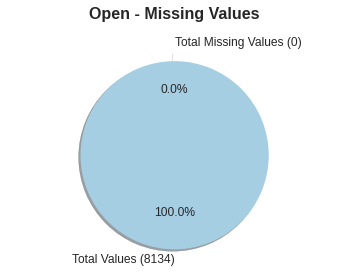

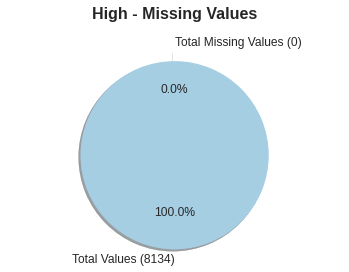

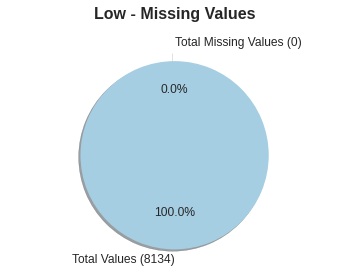

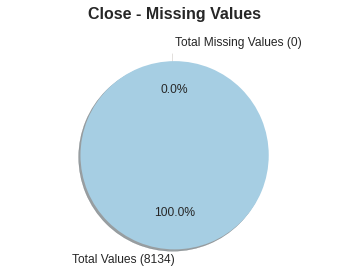

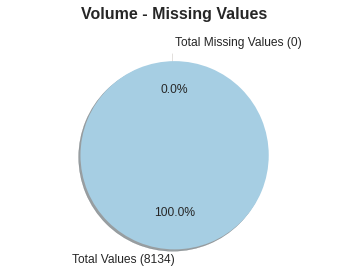

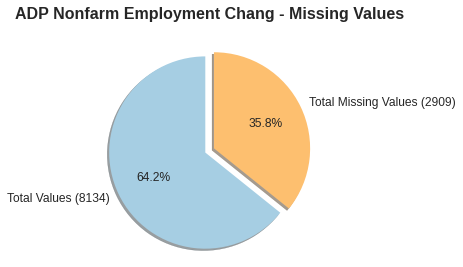

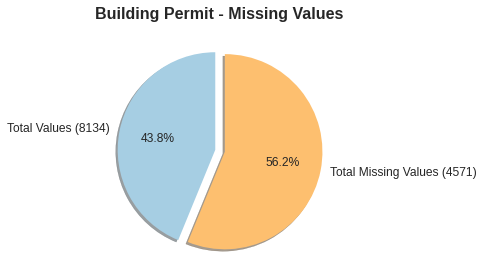

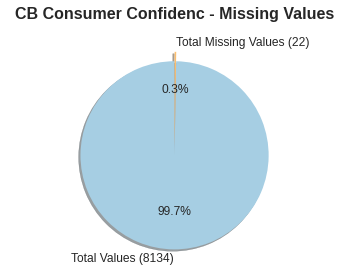

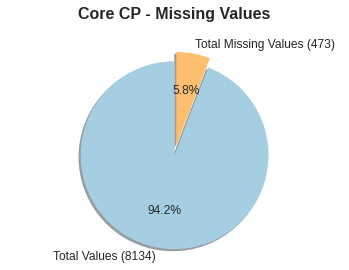

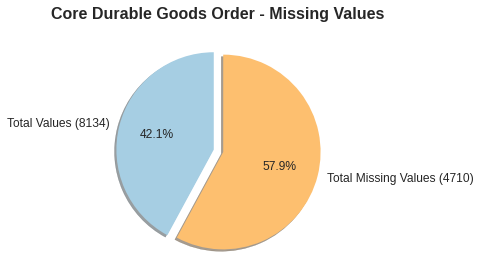

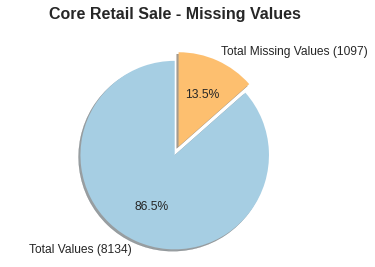

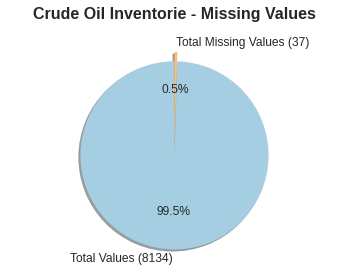

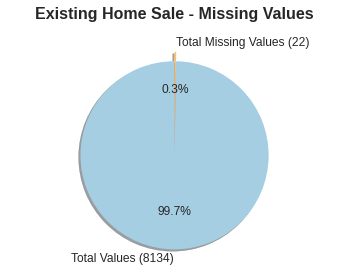

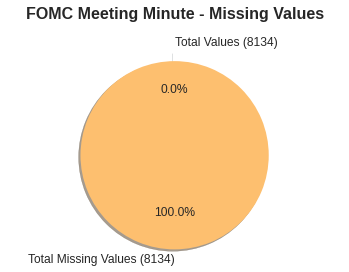

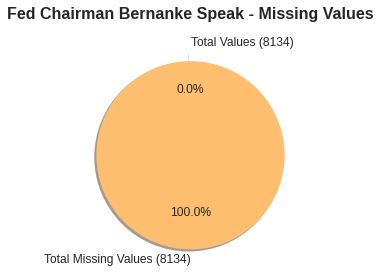

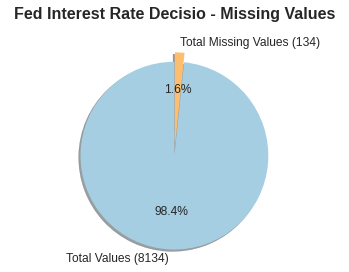

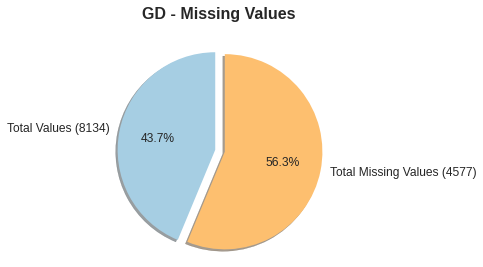

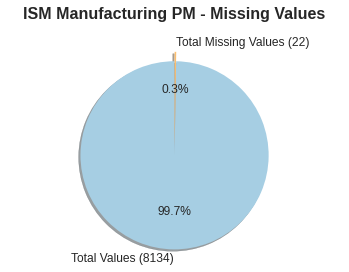

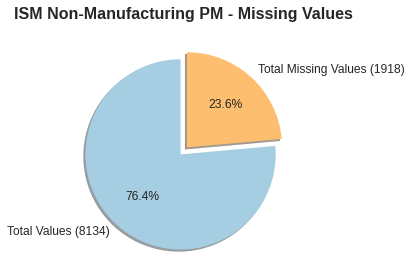

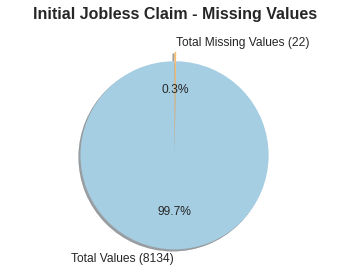

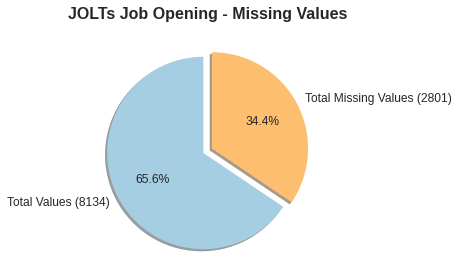

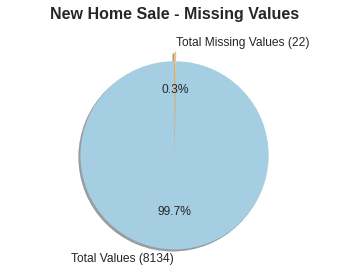

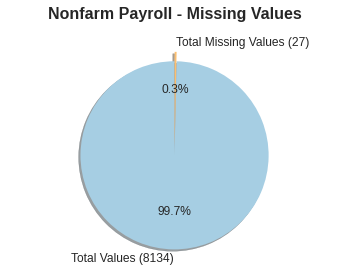

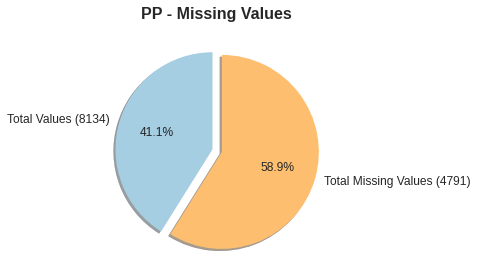

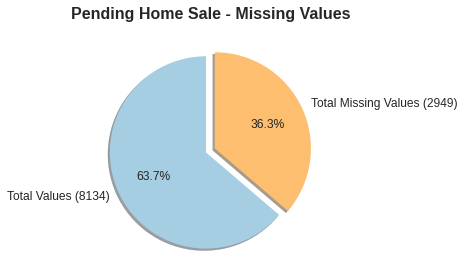

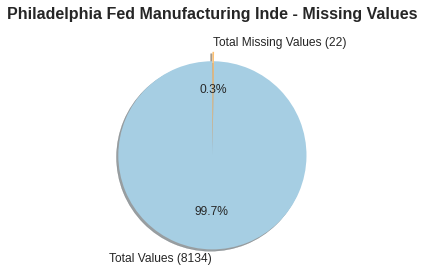

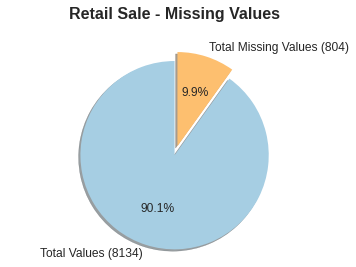

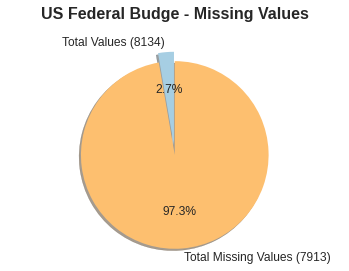

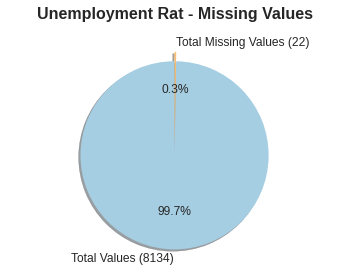

In [8]:
# Missing values summary and plots
sp500_work = print_missing_vals(sp500_calendar)

#### Handling missing values

In [9]:
# Dropping columns with more than 30% of missing values
sp500_work.drop(columns=['Building Permit', 'Core Durable Goods Order', 'FOMC Meeting Minute',
                         'Fed Chairman Bernanke Speak','GD','PP', 'US Federal Budge', 'Pending Home Sale',
                         'JOLTs Job Opening', 'ADP Nonfarm Employment Chang'], inplace=True)


In [10]:
# Selecting data from 01-08-1997 to 01-01-2020
from_date = datetime.date(1997,8,1)
to_date = datetime.date(2020,1,2)
sp500_cleaned = sp500_work.loc[from_date:to_date]

sp500_cleaned.fillna(method='ffill', inplace=True)

/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/venv/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
# Missing nan values check
sp500_cleaned.isna().sum().sort_values(ascending=False)


Open                                   0
Fed Interest Rate Decisio              0
Retail Sale                            0
Philadelphia Fed Manufacturing Inde    0
Nonfarm Payroll                        0
New Home Sale                          0
Initial Jobless Claim                  0
ISM Non-Manufacturing PM               0
ISM Manufacturing PM                   0
Existing Home Sale                     0
High                                   0
Crude Oil Inventorie                   0
Core Retail Sale                       0
Core CP                                0
CB Consumer Confidenc                  0
Volume                                 0
Close                                  0
Low                                    0
Unemployment Rat                       0
dtype: int64

In [12]:
# Missing zero values check
sp500_cleaned.isnull().sum().sort_values(ascending=False)

Open                                   0
Fed Interest Rate Decisio              0
Retail Sale                            0
Philadelphia Fed Manufacturing Inde    0
Nonfarm Payroll                        0
New Home Sale                          0
Initial Jobless Claim                  0
ISM Non-Manufacturing PM               0
ISM Manufacturing PM                   0
Existing Home Sale                     0
High                                   0
Crude Oil Inventorie                   0
Core Retail Sale                       0
Core CP                                0
CB Consumer Confidenc                  0
Volume                                 0
Close                                  0
Low                                    0
Unemployment Rat                       0
dtype: int64

#### Pair Plot Visualization

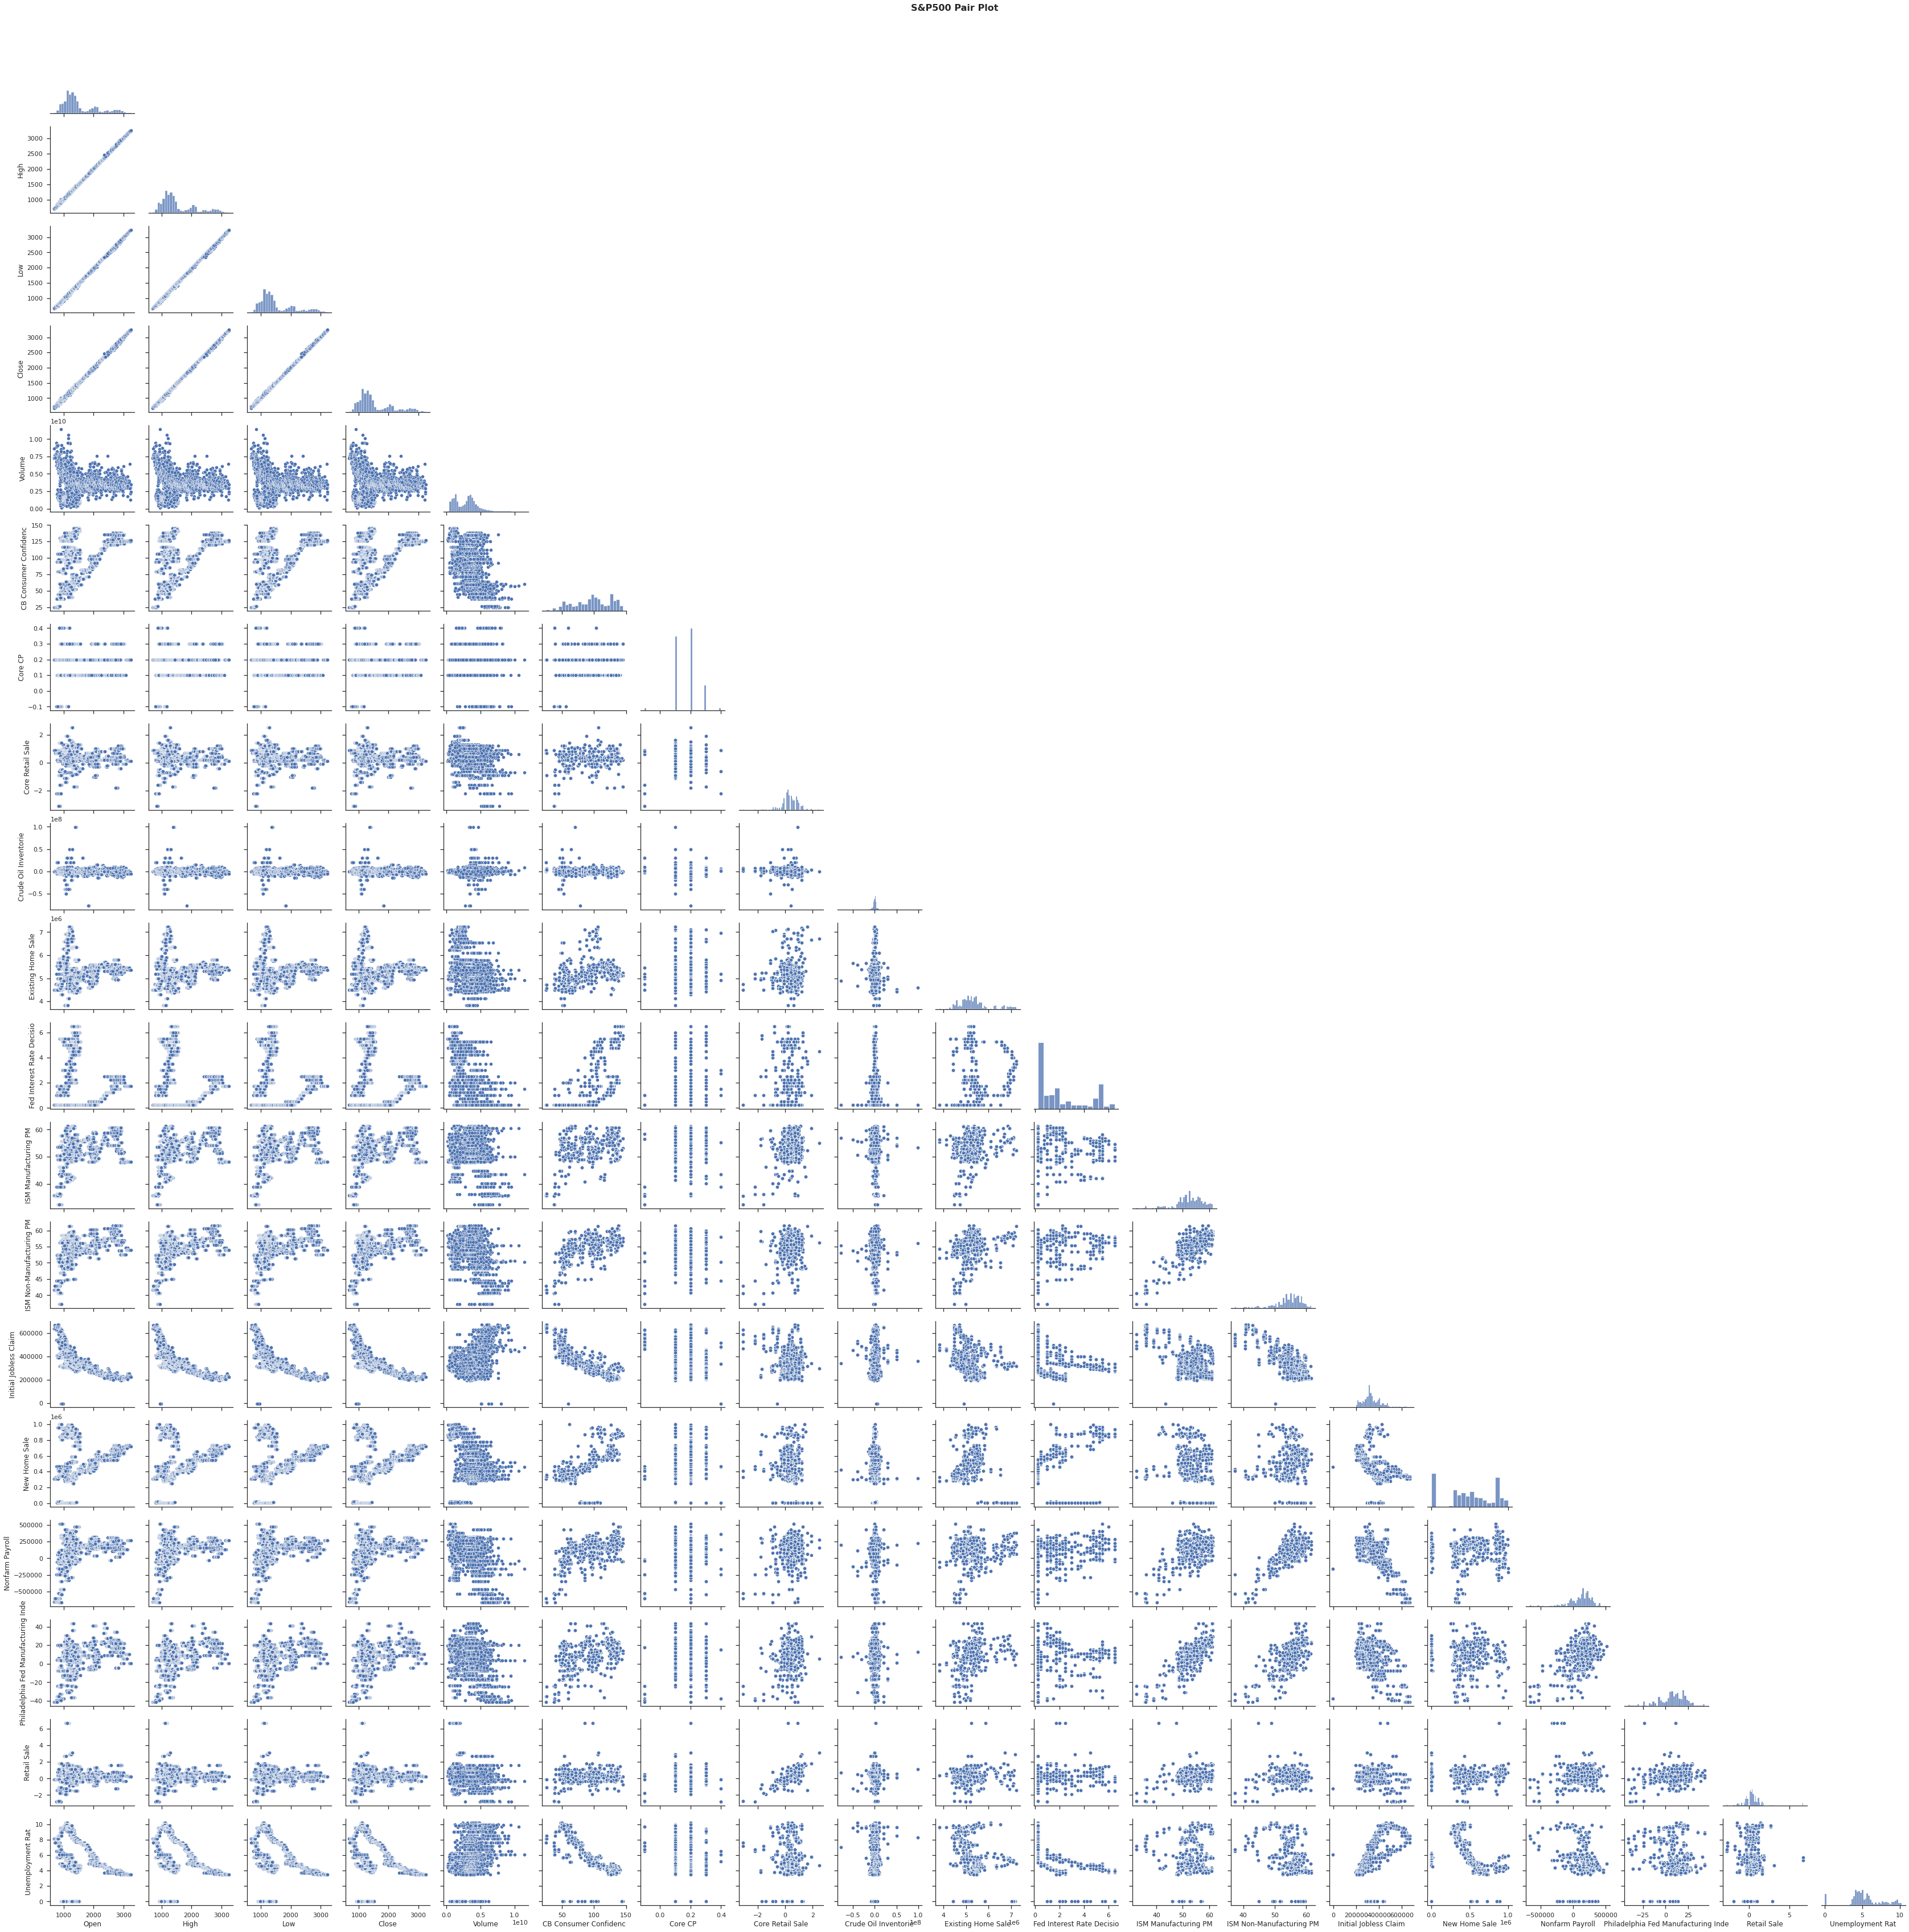

In [13]:
# Print pair plot
columns = sp500_cleaned.columns

sns.set(style="ticks", color_codes=True)
sns.pairplot(sp500_cleaned,vars=columns, dropna=True, corner=True)
plt.suptitle('S&P500 Pair Plot', y=1, fontsize = LARGE_SIZE, fontweight='bold')
plt.savefig('export/sp500_pair_plot.pdf', dpi=600)

#### Correlation Matrix Visualization

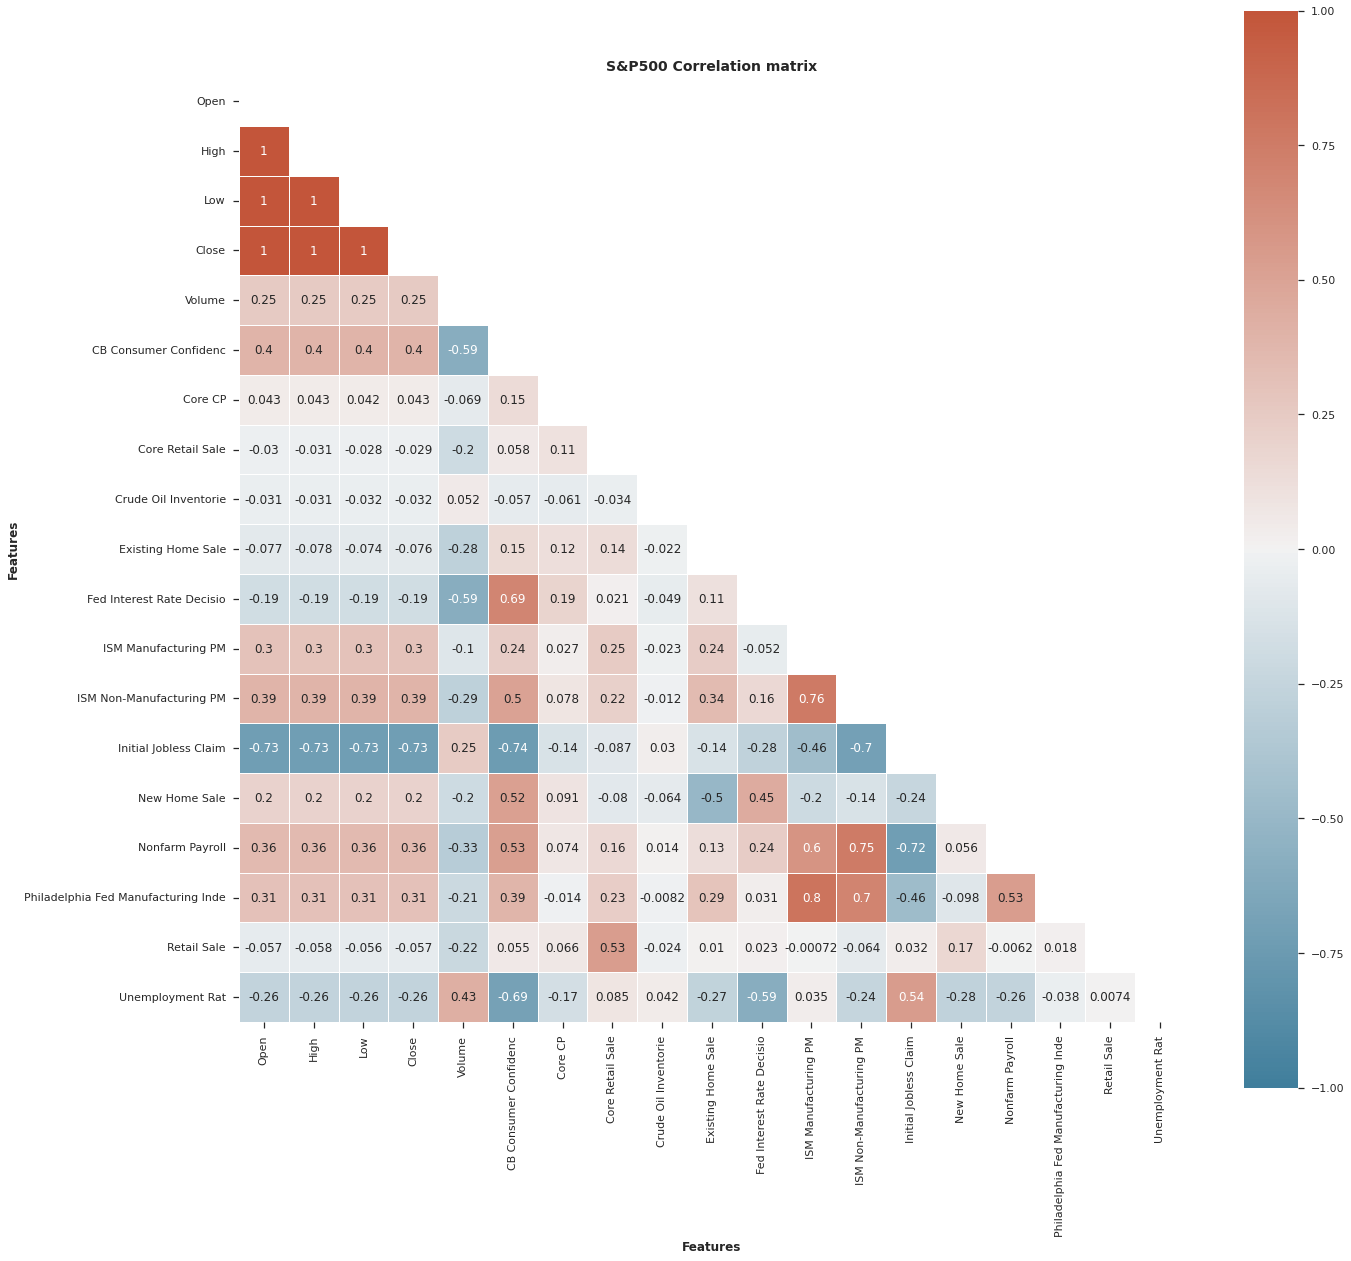

In [14]:
# Print correlation matrix
corr = print_corr_matrix(sp500_cleaned)

#### Pairs sorting

In [15]:
# Pair sorting
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs.drop_duplicates(inplace=True)

print('----- Strong Positive Pairs -----')
strong_positive_pairs = sorted_pairs[sorted_pairs > 0.5]
strong_positive_pairs.drop_duplicates(inplace=True)
print(strong_positive_pairs,'\n')

print('----- Strong Negative Pairs -----')
strong_negative_pairs = sorted_pairs[sorted_pairs < -0.5]
strong_negative_pairs.drop_duplicates(inplace=True)
print(strong_negative_pairs,'\n \n')

----- Strong Positive Pairs -----
CB Consumer Confidenc                ISM Non-Manufacturing PM               0.502259
                                     New Home Sale                          0.515820
Nonfarm Payroll                      CB Consumer Confidenc                  0.525608
Retail Sale                          Core Retail Sale                       0.532434
Nonfarm Payroll                      Philadelphia Fed Manufacturing Inde    0.533979
Unemployment Rat                     Initial Jobless Claim                  0.542066
Nonfarm Payroll                      ISM Manufacturing PM                   0.596788
Fed Interest Rate Decisio            CB Consumer Confidenc                  0.694969
ISM Non-Manufacturing PM             Philadelphia Fed Manufacturing Inde    0.700418
                                     Nonfarm Payroll                        0.751353
                                     ISM Manufacturing PM                   0.762843
Philadelphia Fed Manufacturing 

In [16]:
# Save dataset
sp500_cleaned.to_pickle('data/sp500_cleaned.pickle')

#### Outliers detection and data consistency verification

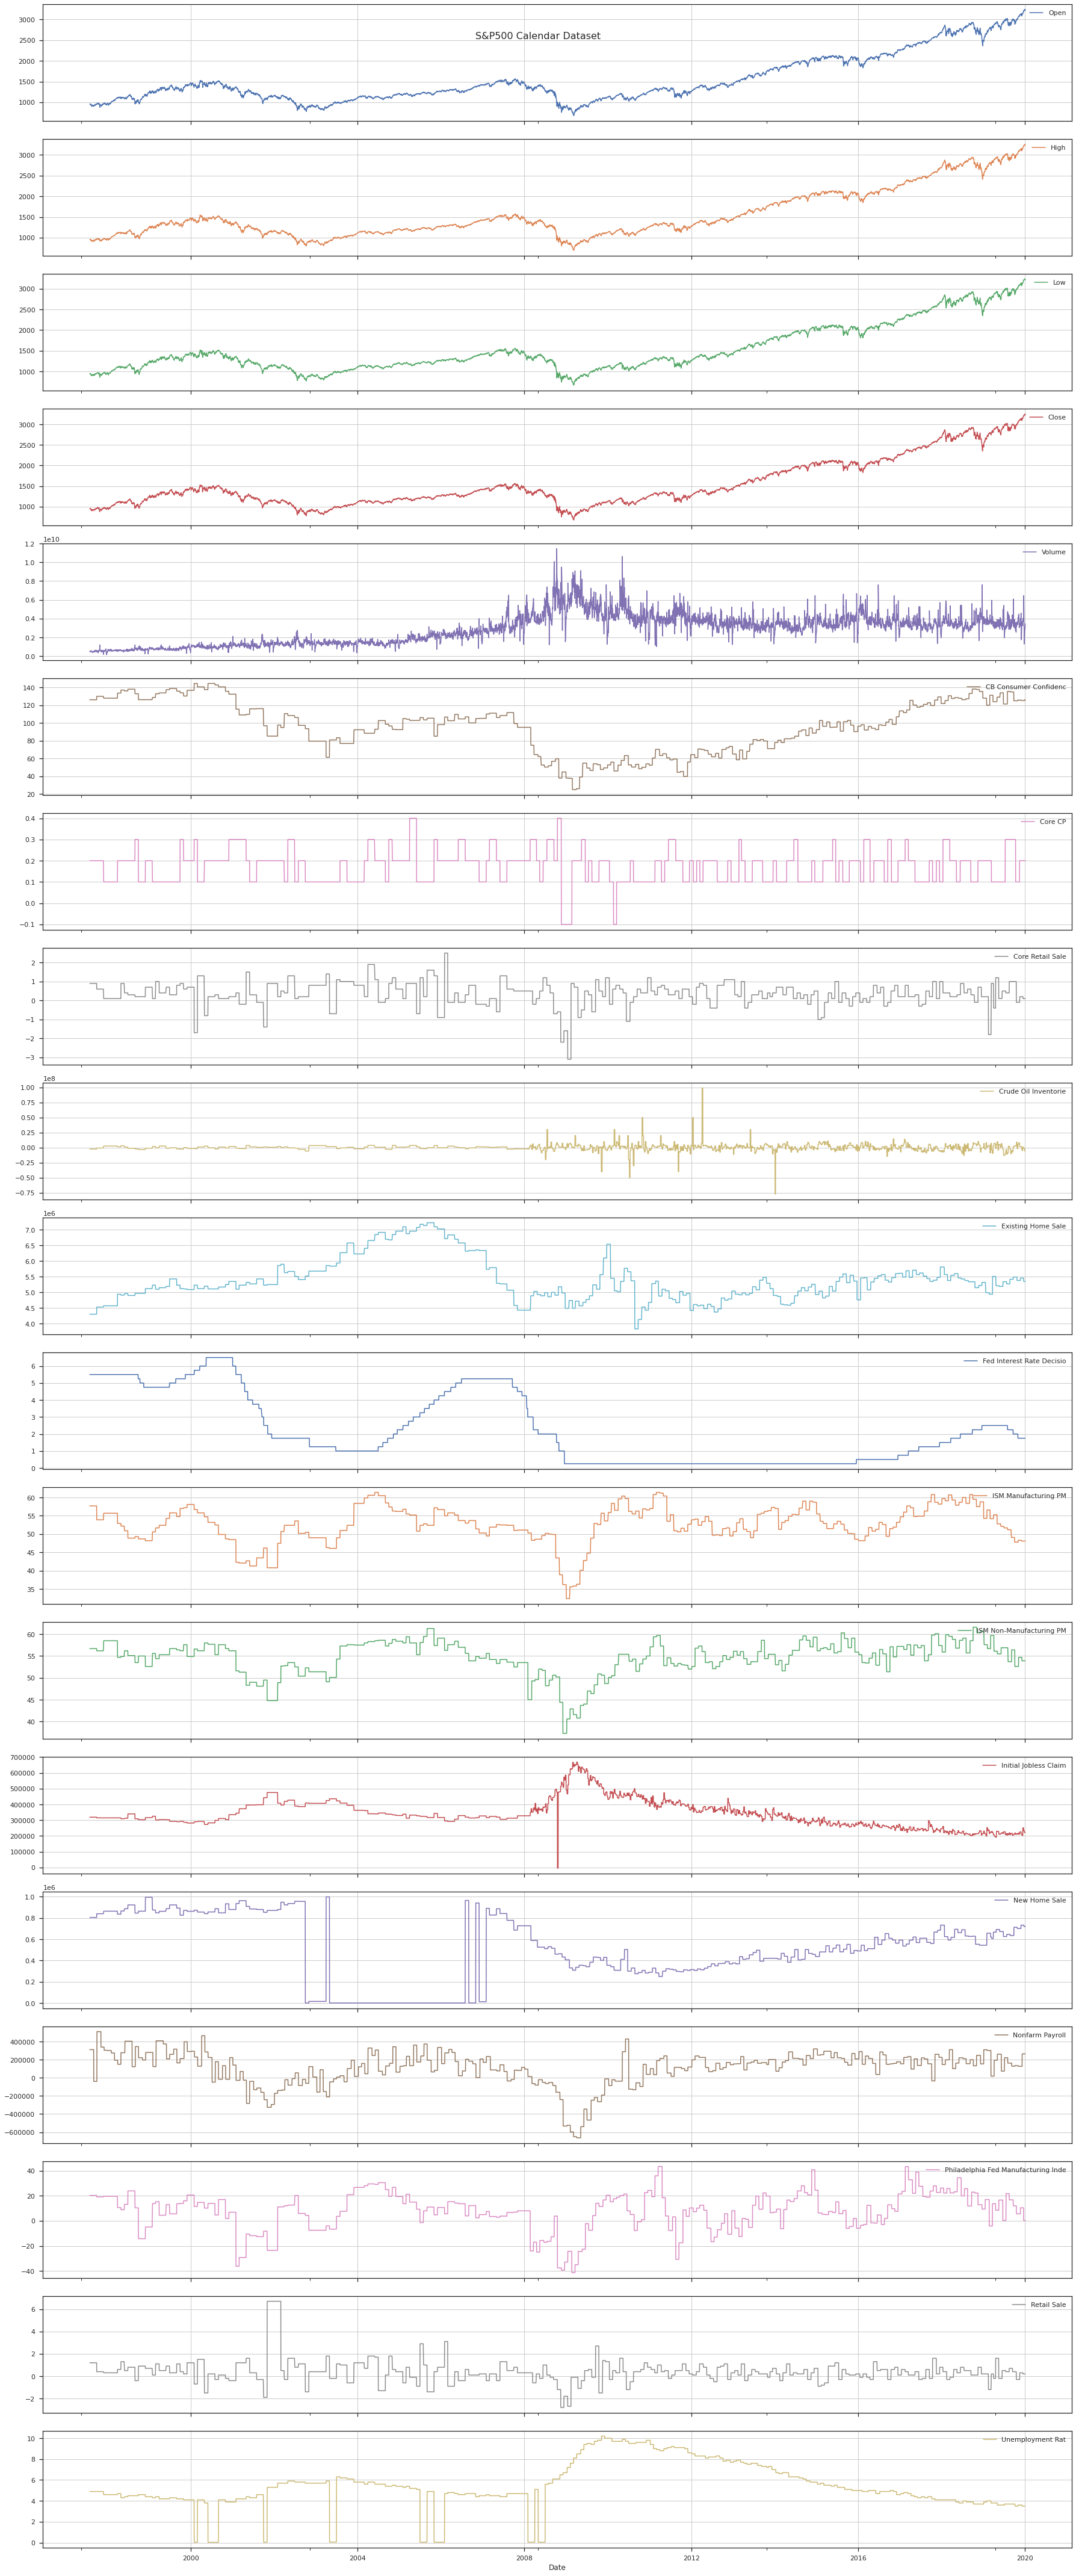

In [17]:
sp500_cleaned.plot(kind='line', subplots=True, grid=True, title="S&P500 Calendar Dataset",
    sharex=True, sharey=False, legend=False, figsize=(25,60))

for ax in plt.gcf().axes:
    ax.legend(loc=1)
plt.tight_layout()
plt.savefig('export/sp500_plots.pdf', dpi=600)

In [18]:
# Save dataset
sp500_cleaned.to_pickle('data/sp500_cleaned.pickle')

In [19]:
# Drop non-correlating features
sp500_cleaned.drop(columns=['Core CP', 'Crude Oil Inventorie', 'Retail Sale', 'Core Retail Sale'], inplace=True)

/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/venv/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# Fixing values inconsistency
sp500_fill = fix_inconsistency(sp500_cleaned)

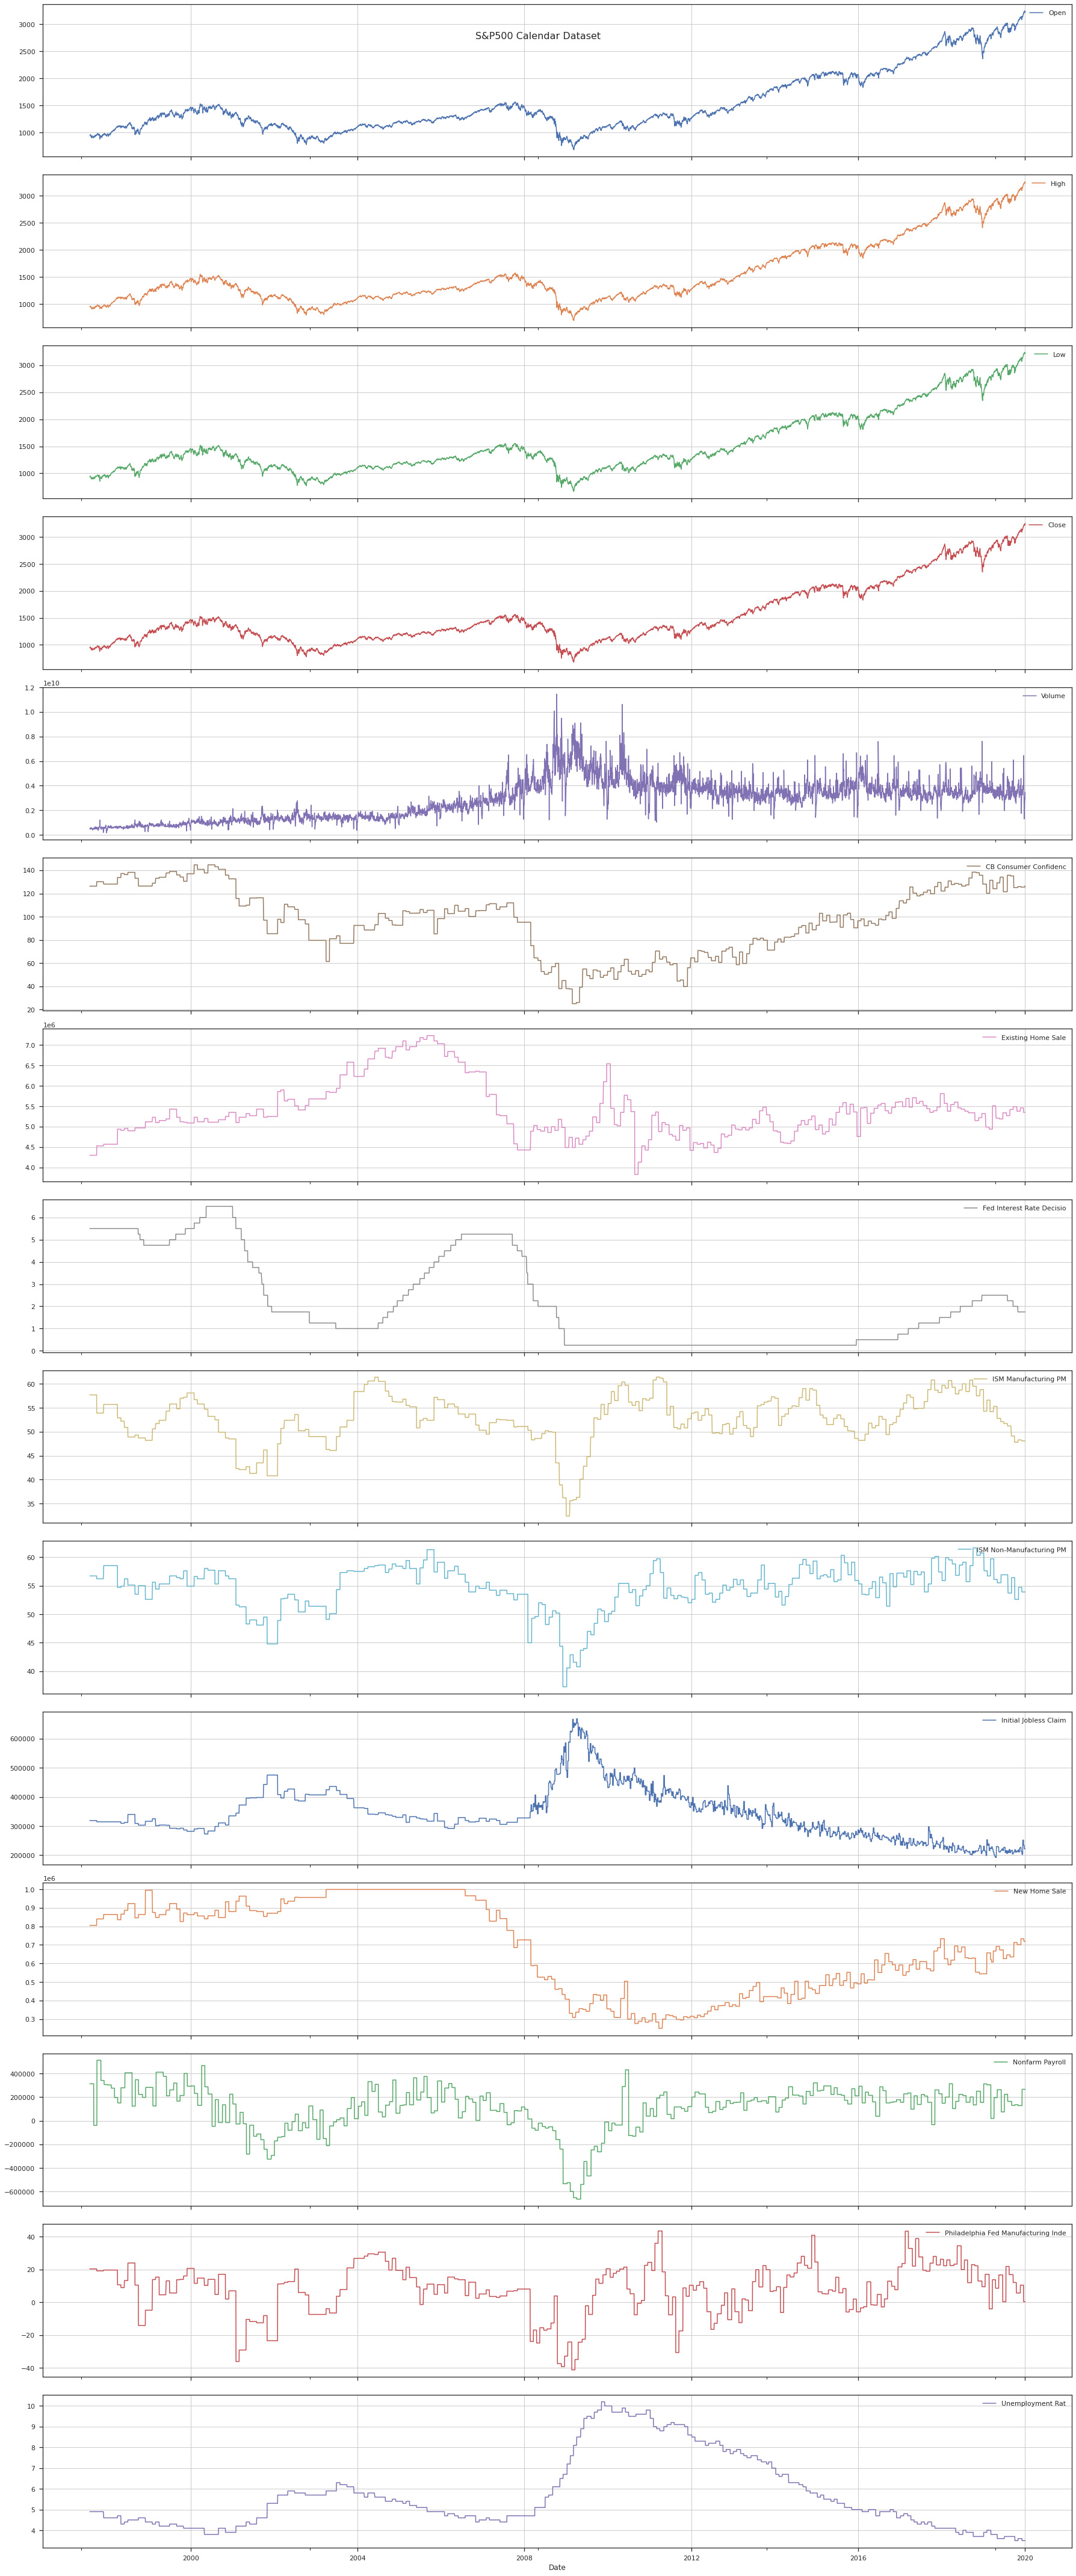

In [21]:
sp500_fill.plot(kind='line', subplots=True, grid=True, title="S&P500 Calendar Dataset",
    sharex=True, sharey=False, legend=False, figsize=(25,60))

for ax in plt.gcf().axes:
    ax.legend(loc=1)
plt.tight_layout()
plt.savefig('export/sp500_plots_fill.pdf', dpi=600)


### Closing price Statistical evaluation

#### Additive Decomposition

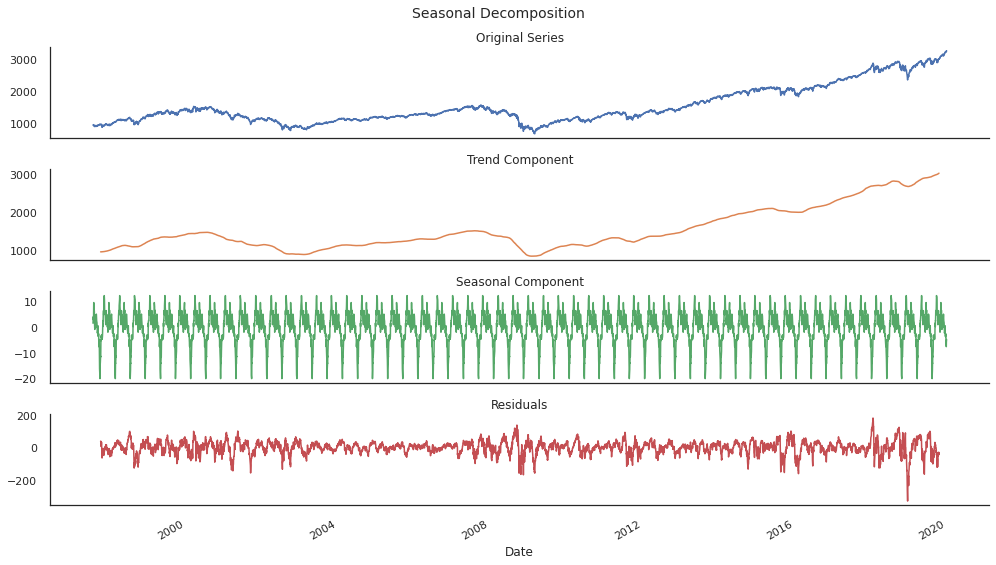

In [22]:
# Printing seasonal decomposition
close_series = seasonal_decomposition(sp500_fill,'Close', 100)

#### Stationarity check

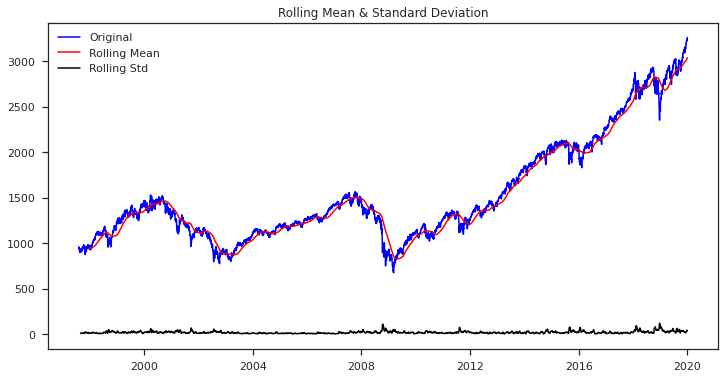

Results of Dickey-Fuller Test:
Test Statistic                    1.334921
p-value                           0.996797
#Lags Used                       18.000000
Number of Observations Used    5623.000000
Critical Value (1%)              -3.431513
Critical Value (5%)              -2.862054
Critical Value (10%)             -2.567044
dtype: float64


In [23]:
# Run stationarity check
stationarity_check(close_series)


#### Correlogram plot

/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


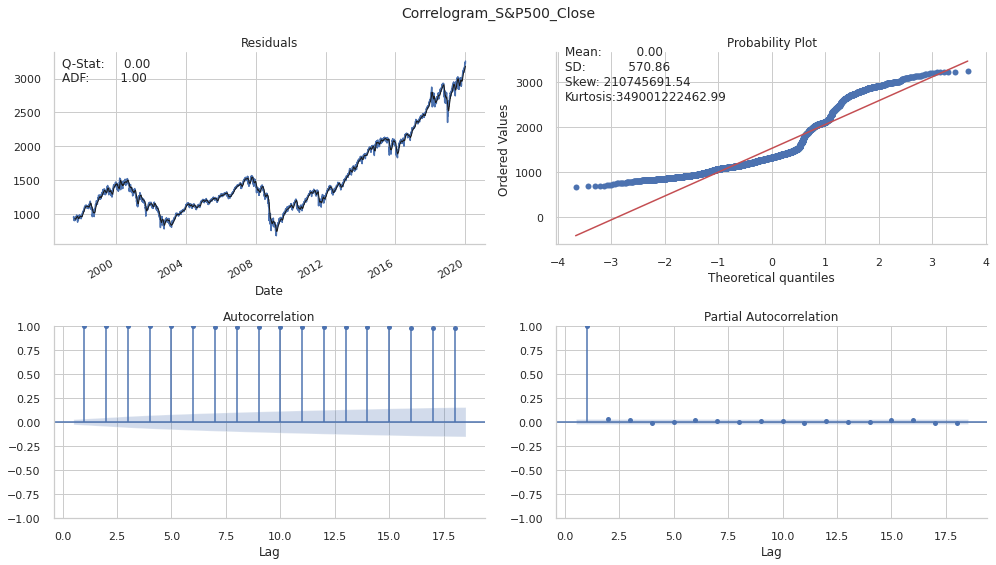

In [24]:
# Plot correlogram
plot_correlogram(close_series, lags=18, title='Correlogram_S&P500_Close')


### Volume Statistical evaluation

#### Additive Decomposition

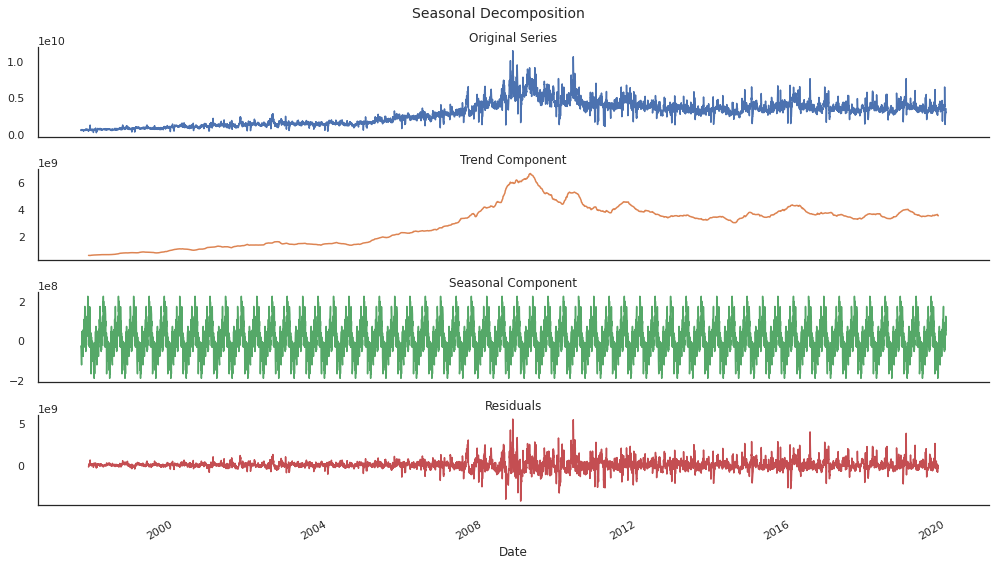

In [25]:
# Printing seasonal decomposition
volume_series = seasonal_decomposition(sp500_fill,'Volume', 100)

#### Stationarity check

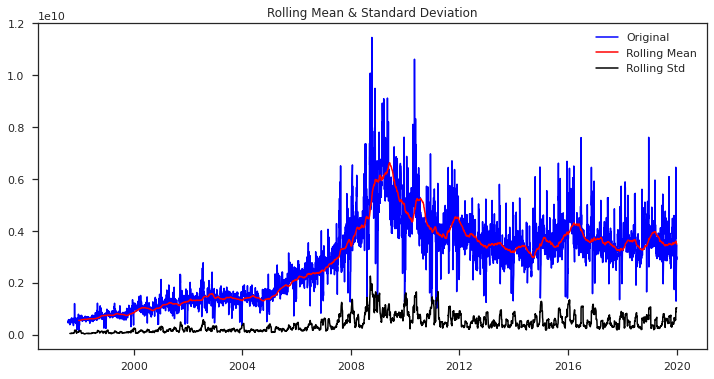

Results of Dickey-Fuller Test:
Test Statistic                   -2.307940
p-value                           0.169420
#Lags Used                       33.000000
Number of Observations Used    5608.000000
Critical Value (1%)              -3.431517
Critical Value (5%)              -2.862056
Critical Value (10%)             -2.567044
dtype: float64


In [26]:
# Run stationarity check
stationarity_check(volume_series)


#### Correlogram plot

/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


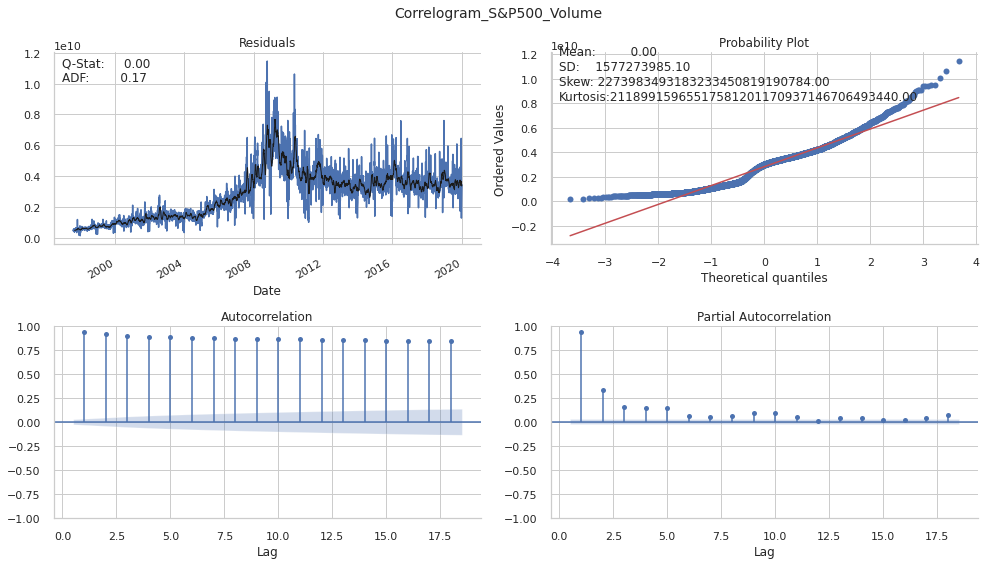

In [27]:
# Plot correlogram
plot_correlogram(volume_series, lags=18, title='Correlogram_S&P500_Volume')

In [28]:
# Save dataset
sp500_fill.to_pickle('data/sp500_fill.pickle')

### 3. Feature engineering <a name="feature-eng"></a>

In [29]:
# Add features and lagged data
%run lib/add_features.py

# Show processed df
sp500

Calculating features...
Features calculation finished in: 0:00:00


/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/lib/add_features.py:112: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[f].shift(lag)  # Create shift to apply lag


Open     High      Low    Close        Volume  \
Date                                                           
1997-12-31   970.84   975.02   967.41   970.43  4.672800e+08   
1998-01-02   970.43   975.04   965.73   975.04  3.667300e+08   
1998-01-05   975.04   982.63   969.00   977.07  6.280700e+08   
1998-01-06   977.07   977.07   962.68   966.58  6.183600e+08   
1998-01-07   966.58   966.58   952.67   964.00  6.673900e+08   
...             ...      ...      ...      ...           ...   
2019-12-26  3227.20  3240.08  3227.20  3239.91  2.160680e+09   
2019-12-27  3247.23  3247.93  3234.37  3240.02  2.428670e+09   
2019-12-30  3240.09  3240.92  3216.57  3221.29  3.013290e+09   
2019-12-31  3215.18  3231.72  3212.03  3230.78  2.893810e+09   
2020-01-02  3244.67  3258.14  3235.53  3257.85  3.458250e+09   

            CB Consumer Confidenc  Existing Home Sale  \
Date                                                    
1997-12-31                  128.1           4570000.0   
1998-01-02                  128.1           4570000.0   
1998-01-05                  128.1           4570000.0   
1998-01-06                  128.1           4570000.0   
1998-01-07                  128.1           4570000.0   
...                           ...                 ...   
2019-12-26                  125.5           5350000.0   
2019-12-27                  125.5           5350000.0   
2019-12-30                  125.5           5350000.0   
2019-12-31                  126.5           5350000.0   
2020-01-02                  126.5           5350000.0   

            Fed Interest Rate Decisio  ISM Manufacturing PM  \
Date                                                          
1997-12-31                       5.50                  55.7   
1998-01-02                       5.50                  55.7   
1998-01-05                       5.50                  55.7   
1998-01-06                       5.50                  55.7   
1998-01-07                       5.50                  55.7   
...                               ...                   ...   
2019-12-26                       1.75                  48.1   
2019-12-27                       1.75                  48.1   
2019-12-30                       1.75                  48.1   
2019-12-31                       1.75                  48.1   
2020-01-02                       1.75                  48.1   

            ISM Non-Manufacturing PM  Initial Jobless Claim  New Home Sale  \
Date                                                                         
1997-12-31                      58.5               315000.0       864000.0   
1998-01-02                      58.5               315000.0       864000.0   
1998-01-05                      58.5               315000.0       864000.0   
1998-01-06                      58.5               315000.0       864000.0   
1998-01-07                      58.5               315000.0       864000.0   
...                              ...                    ...            ...   
2019-12-26                      53.9               222000.0       719000.0   
2019-12-27                      53.9               222000.0       719000.0   
2019-12-30                      53.9               222000.0       719000.0   
2019-12-31                      53.9               222000.0       719000.0   
2020-01-02                      53.9               222000.0       719000.0   

            Nonfarm Payroll  Philadelphia Fed Manufacturing Inde  \
Date                                                               
1997-12-31         306000.0                                 19.6   
1998-01-02         303000.0                                 19.6   
1998-01-05         303000.0                                 19.6   
1998-01-06         303000.0                                 19.6   
1998-01-07         303000.0                                 19.6   
...                     ...                                  ...   
2019-12-26         266000.0                                  

<Figure size 432x288 with 0 Axes>

### 4. Training of the multiple models <a name="models-training"></a>

Training all models...


Training the Random_Forest_Tree model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


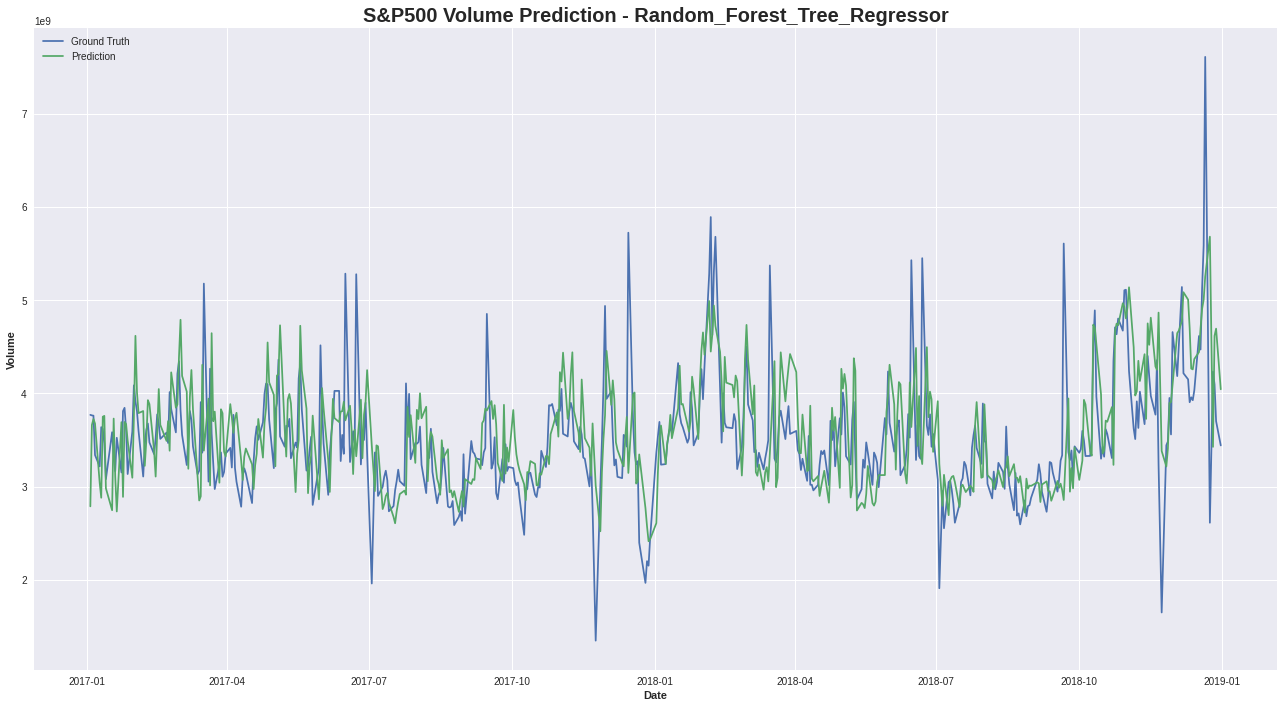


------ The best parameters of the Random_Forest_Tree model are: ------
Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
--------------------------------------------------
The best cross-validation score: -0.8858316297552022
MSE: 568965962
MAE: 20304
--------------------------------------------------

Random_Forest_Tree model training finished in: 0:00:37

Training the Ada_Boost model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


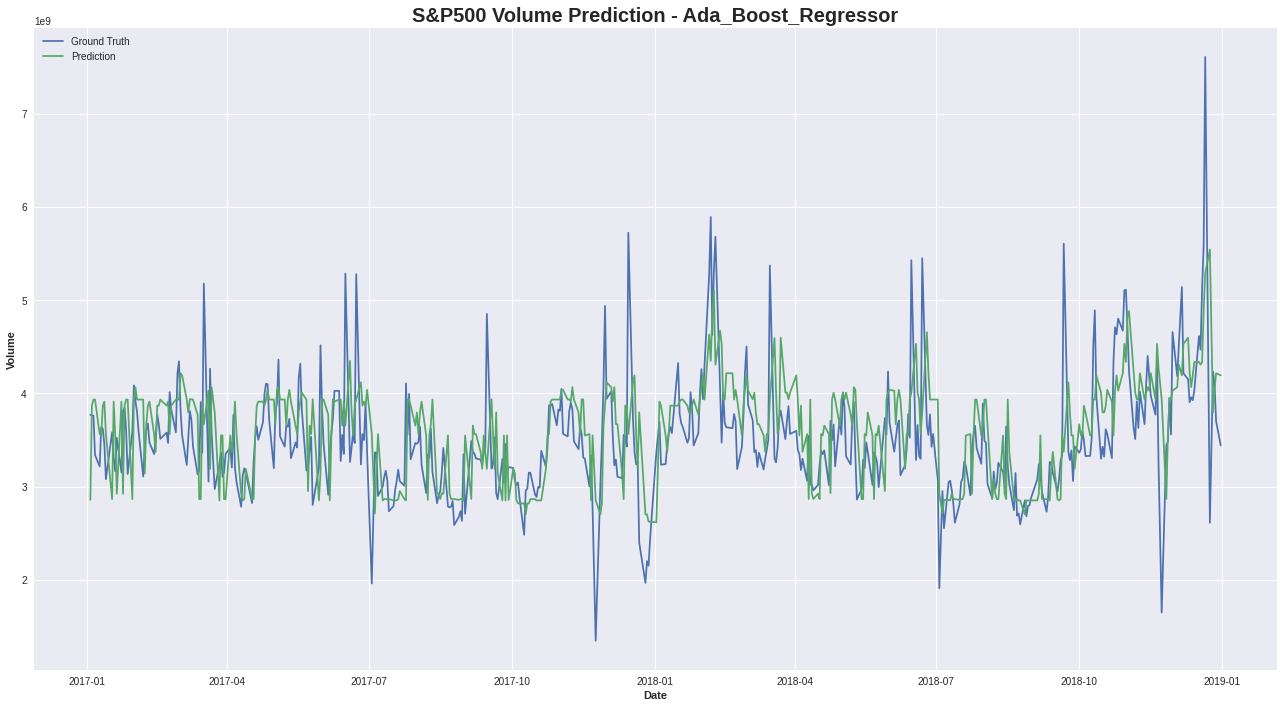


------ The best parameters of the Ada_Boost model are: ------
Pipeline(steps=[('scaler', StandardScaler()), ('ab', AdaBoostRegressor())])
--------------------------------------------------
The best cross-validation score: -1.1989137681146147
MSE: 550386240
MAE: 20128
--------------------------------------------------

Ada_Boost model training finished in: 0:00:04

Training the Gradient_Boost model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


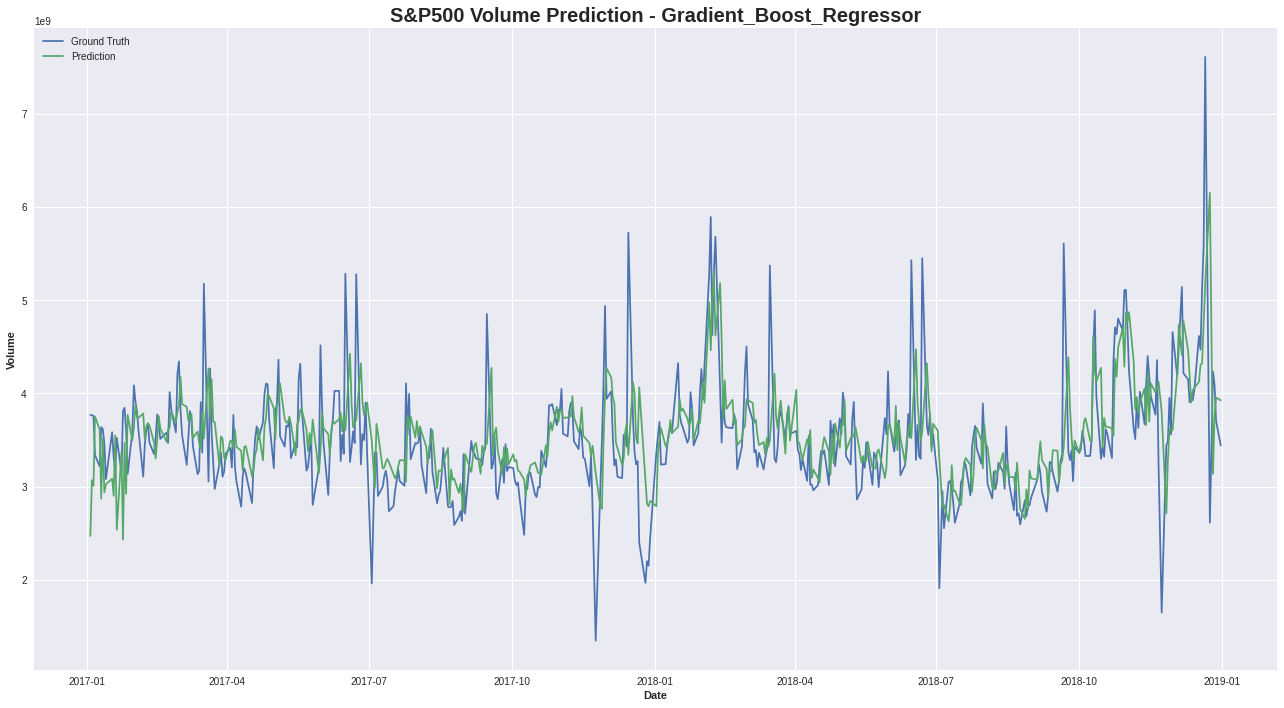


------ The best parameters of the Gradient_Boost model are: ------
Pipeline(steps=[('scaler', StandardScaler()),
                ('gb', GradientBoostingRegressor())])
--------------------------------------------------
The best cross-validation score: -0.6765202096351874
MSE: 529452042
MAE: 18676
--------------------------------------------------

Gradient_Boost model training finished in: 0:00:13

Training the XGboost model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


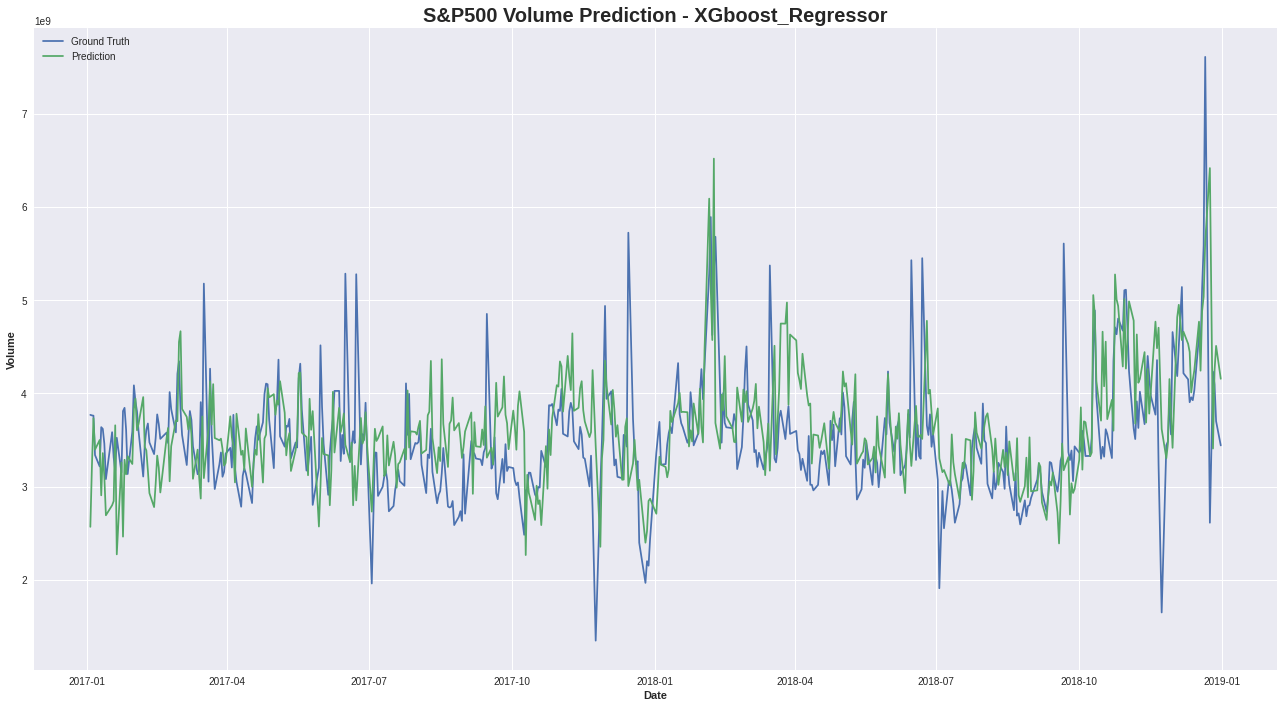


------ The best parameters of the XGboost model are: ------
Pipeline(steps=[('scaler', StandardScaler()),
                ('xgbm',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
            

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   10.0s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [ 119  335  550  766  981 1197]


[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [ 119  335  550  766  981 1197]


[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [ 119  335  550  766  981 1197]


[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  2.7min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.2min finished


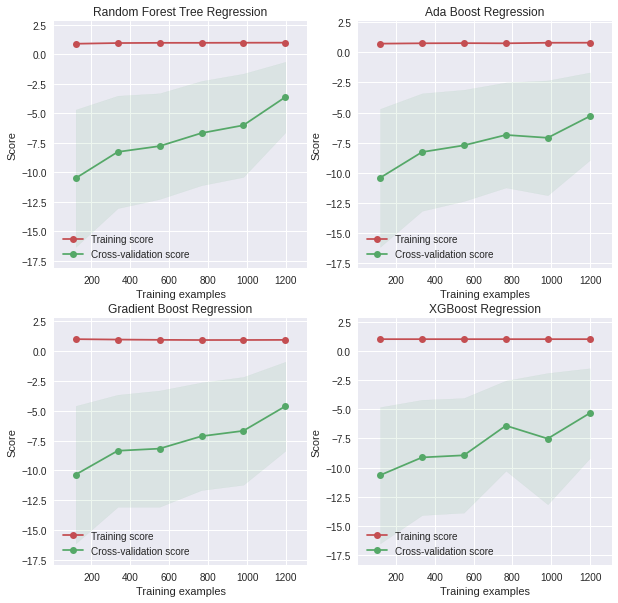


Learning curves plotted in: 0:03:46

All models trained in: 0:05:09


<Figure size 576x396 with 0 Axes>

In [30]:
# Load and extract data from raw CSVs into dataframes for S&P500 and relevant events
%run lib/models_training.py


#### Scores comparison

In [31]:
# Creating the MAE and MSE scores datasets
scores_mae = {'Random Forest Tree': rf_eval[1],
        'Ada Boost': ab_eval[1],
        'Gradient Boost': gb_eval[1],
        'XGBoost': xgbm_eval[1]}

scores_mse = {'Random Forest Tree': rf_eval[0],
        'Ada Boost': ab_eval[0],
        'Gradient Boost': gb_eval[0],
        'XGBoost': xgbm_eval[0]}

In [32]:
# Print MAE Scores
scores_mae

{'Random Forest Tree': 20304,
 'Ada Boost': 20128,
 'Gradient Boost': 18676,
 'XGBoost': 21005}

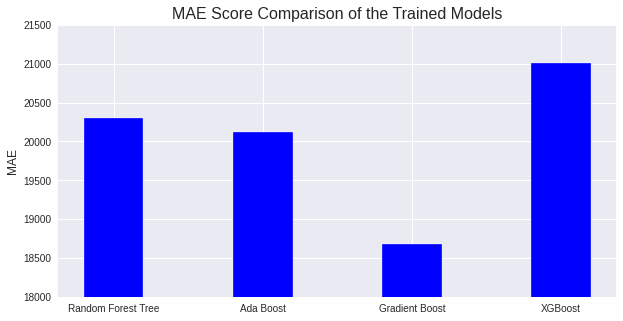

In [33]:
# Plot MAE Scores
print_score(scores_mae,'MAE',[18000, 21500], 'blue')

In [34]:
# Print MSE Scores
scores_mse

{'Random Forest Tree': 568965962,
 'Ada Boost': 550386240,
 'Gradient Boost': 529452042,
 'XGBoost': 622326754}

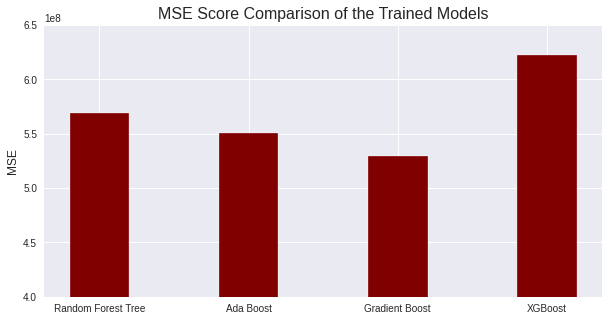

In [35]:
# Plot MSE Scores
print_score(scores_mse,'MSE',[4e8, 6.5e8], 'maroon')

#### Results and dataset with predicted values export

In [36]:
# Selecting the prices and features
sp500_eval = X_test[X_test.columns[:20]]

In [37]:
# Concantenate dataframes
sp500_eval = concat_df(sp500_eval, y_test, '')  # Concating the ground truth volume
sp500_eval = concat_df(sp500_eval, rf_y_pred, '-Random Forest pred')  # Concating the Random Forest volume
sp500_eval = concat_df(sp500_eval, ab_y_pred, '-Ada Boost pred')  # Concating the Ada Boost volume
sp500_eval = concat_df(sp500_eval, gb_y_pred, '-Gradient Boost pred')  # Concating the Gradient Boost volume
sp500_eval = concat_df(sp500_eval, xgbm_y_pred, '-XGBoost pred')  # Concating the XGBoost volume

In [38]:
# Export to csv
sp500_eval.to_csv('export/sp500_eval_data.csv', header=True)

### 5. Results Discussion and Conclusion <a name="conclusion"></a>